In [1]:
import pandas as pd
import numpy as np
import datetime
import dateutils
import time
import snscrape.modules.twitter as sntwitter
import preprocessor as p
import statistics
from typing import List
import tweepy
from textblob import TextBlob
import configparser
import ast

In [2]:
def clean_tweets(all_tweets: List[str]) -> List[str]:
    
    tweets_clean = []
    for tweet in all_tweets:
        tweets_clean.append(p.clean(tweet))
    
    return tweets_clean

In [3]:
def get_sentiment(tweets_clean: List[str]) -> List[float]:
    
    polarity_scores = []
    subjectivity_scores = []
    for tweet in tweets_clean:
        blob = TextBlob(tweet)
        polarity_scores.append(blob.sentiment.polarity)
        subjectivity_scores.append(blob.sentiment.subjectivity)
    
    return polarity_scores, subjectivity_scores

In [4]:
def generate_average_sentiment_score(keyword: str) -> float:
    
    tweets = get_tweets(keyword)
    tweets_clean = clean_tweets(tweets)
    sentiment_scores = get_sentiment(tweets_clean)
    
    average_score = statistics.mean(sentiment_scores)
    
    return average_score

In [5]:
glassjars = pd.read_csv('Glass_Jars.csv')
tetrapack = pd.read_csv('Tetra_Pack.csv')
metalbottle = pd.read_csv('Metal_Bottles.csv')
baginbox = pd.read_csv('BaginBox.csv')
plasticbottles = pd.read_csv('Plastic_Bottles.csv')
plasticjars = pd.read_csv('Plastic_Jars.csv')
#spiked_seltzers = pd.read_excel('spiked_seltzers.xlsx', engine = 'openpyxl')

In [6]:
glassjars_tweets = glassjars.text.tolist()
tetrapack_tweets = tetrapack.text.tolist()
metalbottle_tweets = metalbottle.text.tolist()
baginbox_tweets = baginbox.text.tolist()
plasticbottles_tweets = plasticbottles.text.tolist()
plasticjars_tweets = plasticjars.text.tolist()
#selt_tweets = spiked_seltzers.text.tolist()

In [10]:
glassjars_clean = clean_tweets(glassjars_tweets)
tetrapack_clean = clean_tweets(tetrapack_tweets)
metalbottle_clean = clean_tweets(metalbottle_tweets)
baginbox_clean = clean_tweets(baginbox_tweets)
plasticbottles_clean = clean_tweets(plasticbottles_tweets)
plasticjars_clean = clean_tweets(plasticjars_tweets)

#selt_clean = clean_tweets(selt_tweets)

In [11]:
glassjars_polar, glassjars_subj = get_sentiment(glassjars_tweets)
tetrapack_polar, tetrapack_subj = get_sentiment(tetrapack_tweets)
metalbottle_polar, metalbottle_subj = get_sentiment(metalbottle_tweets)
baginbox_polar, baginbox_subj = get_sentiment(baginbox_tweets)
plasticbottles_polar, plasticbottles_subj = get_sentiment(plasticbottles_tweets)
plasticjars_polar, plasticjars_subj = get_sentiment(plasticjars_tweets)

#selt_polar, selt_subj = get_sentiment(selt_clean)

In [12]:
print('sentiment of tweets mentioning about GlassJars: ')
print(min(glassjars_polar))
print(statistics.mean(glassjars_polar))
print(max(glassjars_polar))
print()

sentiment of tweets mentioning about GlassJars: 
-0.625
0.12397435897435898
1.0



In [13]:
print('sentiment of tweets mentioning about Tetrapack: ')
print(min(tetrapack_polar))
print(statistics.mean(tetrapack_polar))
print(max(tetrapack_polar))
print()

sentiment of tweets mentioning about Tetrapack: 
-0.2
0.11
0.6



In [14]:
print('sentiment of tweets mentioning about Metal Bottles: ')
print(min(metalbottle_polar))
print(statistics.mean(metalbottle_polar))
print(max(metalbottle_polar))
print()

sentiment of tweets mentioning about Metal Bottles: 
0.0
0.23647222222222222
0.6



In [15]:
print('sentiment of tweets mentioning about Bag In Box: ')
print(min(baginbox_polar))
print(statistics.mean(baginbox_polar))
print(max(baginbox_polar))
print()

sentiment of tweets mentioning about Bag In Box: 
-0.6
-0.08839285714285713
0.1



In [16]:
print('sentiment of tweets mentioning about Plastic Bottles: ')
print(min(plasticbottles_polar))
print(statistics.mean(plasticbottles_polar))
print(max(plasticbottles_polar))
print()

sentiment of tweets mentioning about Plastic Bottles: 
-0.2
0.08357142857142857
0.35



In [17]:
print('sentiment of tweets mentioning about Plastic Jars: ')
print(min(plasticjars_polar))
print(statistics.mean(plasticjars_polar))
print(max(plasticjars_polar))
print()

sentiment of tweets mentioning about Plastic Jars: 
-0.39375
0.010624999999999999
0.5916666666666667



In [18]:
y  = list(range(1,10))
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


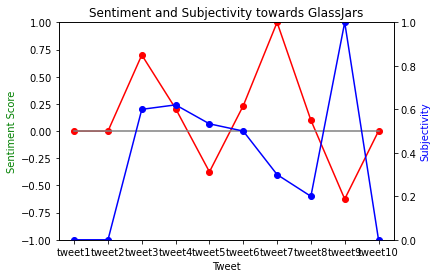

In [29]:
import matplotlib.pyplot as plt
x = ['tweet' + str(x) for x in range (1,11)]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
plt.plot(x, [0.5]*10, linestyle="-", color = 'grey')
ax1.plot(x, glassjars_polar, 'o-', color = 'red')
ax2.plot(x, glassjars_subj, 'o-', color="blue" )


ax1.set_xlabel('Tweet')
ax1.set_ylabel('Sentiment Score', color='g')
ax2.set_ylabel('Subjectivity', color='b')
ax1.set_ylim([-1, 1])
ax2.set_ylim([0, 1])
plt.title('Sentiment and Subjectivity towards GlassJars')


plt.show()

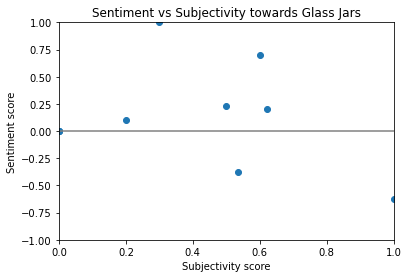

In [31]:
fig, ax = plt.subplots()
ax.scatter(glassjars_subj, glassjars_polar)
plt.plot((0,2), [0]*2, linestyle="-", color = 'grey')
plt.title('Sentiment vs Subjectivity towards Glass Jars')
ax.set_xlabel('Subjectivity score')
ax.set_ylabel('Sentiment score')
ax.set_xlim([0,1])
ax.set_ylim([-1,1])
plt.show()

In [58]:
from scipy.stats import pearsonr

corr_glassjars, _ = pearsonr(glassjars_polar, glassjars_subj)

In [59]:
corr_glassjars

-0.21746364082002473

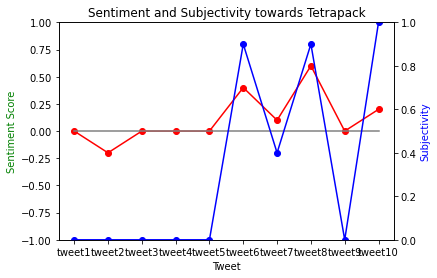

In [32]:
import matplotlib.pyplot as plt
x = ['tweet' + str(x) for x in range (1,11)]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
plt.plot(x, [0.5]*10, linestyle="-", color = 'grey')
ax1.plot(x, tetrapack_polar, 'o-', color = 'red')
ax2.plot(x, tetrapack_subj, 'o-', color="blue" )


ax1.set_xlabel('Tweet')
ax1.set_ylabel('Sentiment Score', color='g')
ax2.set_ylabel('Subjectivity', color='b')
ax1.set_ylim([-1, 1])
ax2.set_ylim([0, 1])
plt.title('Sentiment and Subjectivity towards Tetrapack')


plt.show()

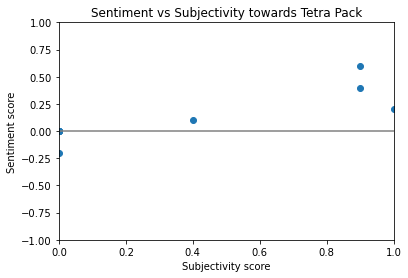

In [33]:
fig, ax = plt.subplots()
ax.scatter(tetrapack_subj, tetrapack_polar)
plt.plot((0,2), [0]*2, linestyle="-", color = 'grey')
plt.title('Sentiment vs Subjectivity towards Tetra Pack')
ax.set_xlabel('Subjectivity score')
ax.set_ylabel('Sentiment score')
ax.set_xlim([0,1])
ax.set_ylim([-1,1])
plt.show()

In [51]:
from scipy.stats import pearsonr

corr_tetrapack, _ = pearsonr(tetrapack_polar, tetrapack_subj)
corr_tetrapack

0.8503731362690208

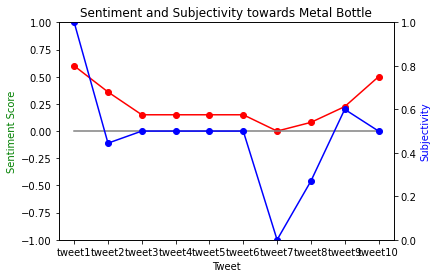

In [34]:
import matplotlib.pyplot as plt
x = ['tweet' + str(x) for x in range (1,11)]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
plt.plot(x, [0.5]*10, linestyle="-", color = 'grey')
ax1.plot(x, metalbottle_polar, 'o-', color = 'red')
ax2.plot(x, metalbottle_subj, 'o-', color="blue" )


ax1.set_xlabel('Tweet')
ax1.set_ylabel('Sentiment Score', color='g')
ax2.set_ylabel('Subjectivity', color='b')
ax1.set_ylim([-1, 1])
ax2.set_ylim([0, 1])
plt.title('Sentiment and Subjectivity towards Metal Bottle')


plt.show()

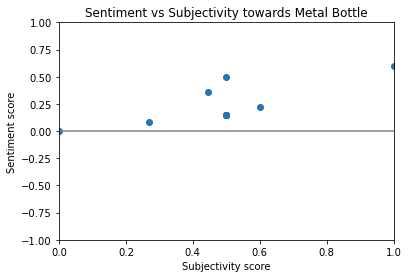

In [35]:
fig, ax = plt.subplots()
ax.scatter(metalbottle_subj, metalbottle_polar)
plt.plot((0,2), [0]*2, linestyle="-", color = 'grey')
plt.title('Sentiment vs Subjectivity towards Metal Bottle')
ax.set_xlabel('Subjectivity score')
ax.set_ylabel('Sentiment score')
ax.set_xlim([0,1])
ax.set_ylim([-1,1])
plt.show()

In [50]:
from scipy.stats import pearsonr

corr_metalbottle, _ = pearsonr(metalbottle_polar, metalbottle_subj)
corr_metalbottle

0.7644673574808405

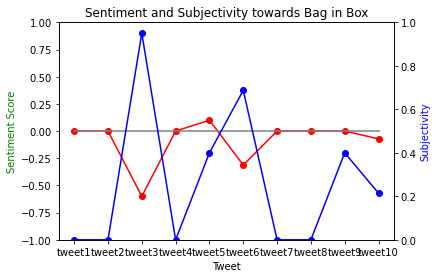

In [36]:
import matplotlib.pyplot as plt
x = ['tweet' + str(x) for x in range (1,11)]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
plt.plot(x, [0.5]*10, linestyle="-", color = 'grey')
ax1.plot(x, baginbox_polar, 'o-', color = 'red')
ax2.plot(x, baginbox_subj, 'o-', color="blue" )


ax1.set_xlabel('Tweet')
ax1.set_ylabel('Sentiment Score', color='g')
ax2.set_ylabel('Subjectivity', color='b')
ax1.set_ylim([-1, 1])
ax2.set_ylim([0, 1])
plt.title('Sentiment and Subjectivity towards Bag in Box')


plt.show()

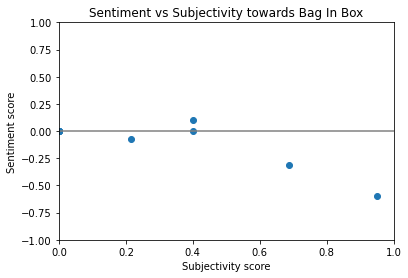

In [37]:
fig, ax = plt.subplots()
ax.scatter(baginbox_subj, baginbox_polar)
plt.plot((0,2), [0]*2, linestyle="-", color = 'grey')
plt.title('Sentiment vs Subjectivity towards Bag In Box')
ax.set_xlabel('Subjectivity score')
ax.set_ylabel('Sentiment score')
ax.set_xlim([0,1])
ax.set_ylim([-1,1])
plt.show()

In [49]:
from scipy.stats import pearsonr

corr_baginbox, _ = pearsonr(baginbox_polar, baginbox_subj)
corr_baginbox

-0.821513061383934

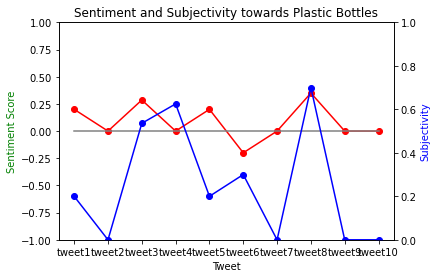

In [60]:
import matplotlib.pyplot as plt
x = ['tweet' + str(x) for x in range (1,11)]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
plt.plot(x, [0.5]*10, linestyle="-", color = 'grey')
ax1.plot(x, plasticbottles_polar, 'o-', color = 'red')
ax2.plot(x, plasticbottles_subj, 'o-', color="blue" )


ax1.set_xlabel('Tweet')
ax1.set_ylabel('Sentiment Score', color='g')
ax2.set_ylabel('Subjectivity', color='b')
ax1.set_ylim([-1, 1])
ax2.set_ylim([0, 1])
plt.title('Sentiment and Subjectivity towards Plastic Bottles')


plt.show()

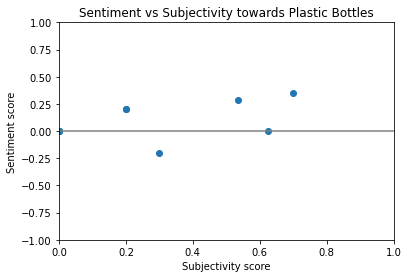

In [61]:
fig, ax = plt.subplots()
ax.scatter(plasticbottles_subj, plasticbottles_polar)
plt.plot((0,2), [0]*2, linestyle="-", color = 'grey')
plt.title('Sentiment vs Subjectivity towards Plastic Bottles')
ax.set_xlabel('Subjectivity score')
ax.set_ylabel('Sentiment score')
ax.set_xlim([0,1])
ax.set_ylim([-1,1])
plt.show()

In [62]:
from scipy.stats import pearsonr

corr_plasticbottles, _ = pearsonr(plasticbottles_polar, plasticbottles_subj)
corr_plasticbottles

0.490041509585009

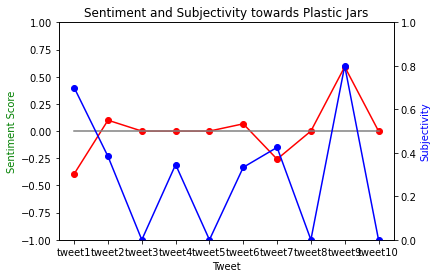

In [63]:
import matplotlib.pyplot as plt
x = ['tweet' + str(x) for x in range (1,11)]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
plt.plot(x, [0.5]*10, linestyle="-", color = 'grey')
ax1.plot(x, plasticjars_polar, 'o-', color = 'red')
ax2.plot(x, plasticjars_subj, 'o-', color="blue" )


ax1.set_xlabel('Tweet')
ax1.set_ylabel('Sentiment Score', color='g')
ax2.set_ylabel('Subjectivity', color='b')
ax1.set_ylim([-1, 1])
ax2.set_ylim([0, 1])
plt.title('Sentiment and Subjectivity towards Plastic Jars')


plt.show()

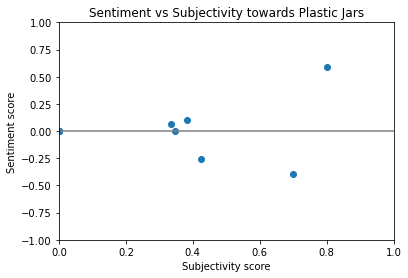

In [64]:
fig, ax = plt.subplots()
ax.scatter(plasticjars_subj, plasticjars_polar)
plt.plot((0,2), [0]*2, linestyle="-", color = 'grey')
plt.title('Sentiment vs Subjectivity towards Plastic Jars')
ax.set_xlabel('Subjectivity score')
ax.set_ylabel('Sentiment score')
ax.set_xlim([0,1])
ax.set_ylim([-1,1])
plt.show()

In [65]:
from scipy.stats import pearsonr

corr_plasticjars, _ = pearsonr(plasticjars_polar, plasticjars_subj)
corr_plasticjars

0.17106164879019806